<a href="https://colab.research.google.com/github/filza-rahman/amazon-bestsellers-analysis/blob/main/amazon_bestsellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Best Sellers Data Analysis (2009–2019)
Author: Filza Rahman  
Description: An analysis of top-selling books using Python, pandas, and matplotlib.


In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Load the Dataset
Load the CSV file containing the Amazon bestsellers data.

In [2]:
df = pd.read_csv('bestsellers.csv')

print(" Data successfully loaded!\n")
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())


 Data successfully loaded!

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

Shape of dataset: (550, 7)

Columns: ['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


# Step 3: Clean the Data
- Remove duplicates  
- Rename columns for clarity  
- Convert Price column to float

In [3]:
df.drop_duplicates(inplace=True)

df.rename(columns={
    "Name": "Title",
    "User Rating": "Rating",
    "Year": "Publication Year"
}, inplace=True)

df["Price"] = df["Price"].astype(float)

print("\nData cleaned and ready for analysis")
print(df.info())



Data cleaned and ready for analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             550 non-null    object 
 1   Author            550 non-null    object 
 2   Rating            550 non-null    float64
 3   Reviews           550 non-null    int64  
 4   Price             550 non-null    float64
 5   Publication Year  550 non-null    int64  
 6   Genre             550 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 30.2+ KB
None


## Step 4: Exploratory Data Analysis (EDA)
### 4.1 Distribution of Books by Genre


Books by Genre:
 Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


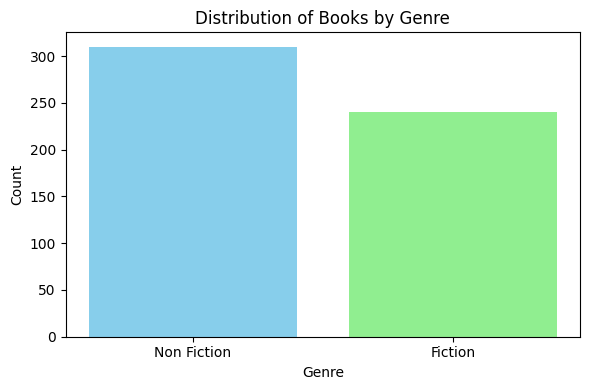

In [4]:
genre_counts = df['Genre'].value_counts()
print("\nBooks by Genre:\n", genre_counts)

plt.figure(figsize=(6,4))
plt.bar(genre_counts.index, genre_counts.values, color=['skyblue','lightgreen'])
plt.title("Distribution of Books by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 4.2 Top 10 Authors by Number of Bestsellers


Top 10 Authors:
 Author
Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
Eric Carle                             7
Name: count, dtype: int64


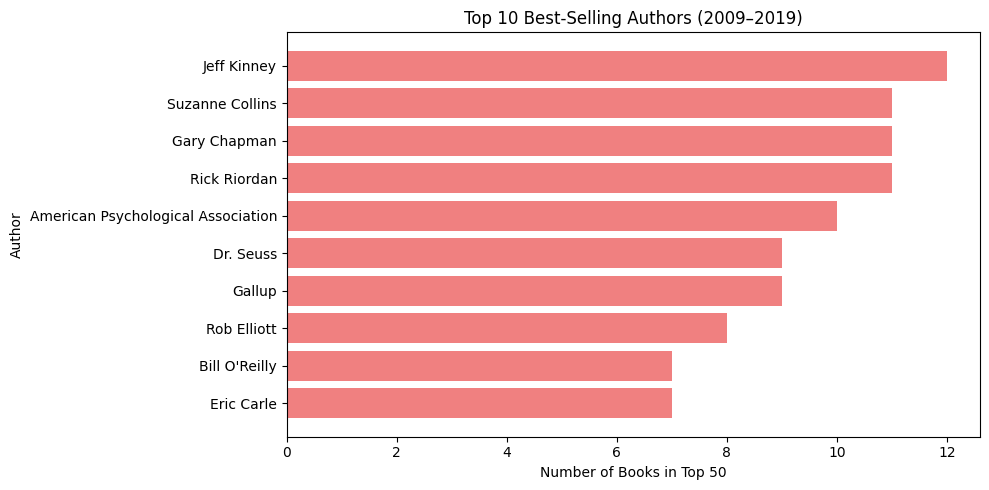

In [5]:
author_counts = df['Author'].value_counts().head(10)
print("\nTop 10 Authors:\n", author_counts)

plt.figure(figsize=(10,5))
plt.barh(author_counts.index[::-1], author_counts.values[::-1], color='lightcoral')
plt.title("Top 10 Best-Selling Authors (2009–2019)")
plt.xlabel("Number of Books in Top 50")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

### 4.3 Average Rating by Genre


Average Rating by Genre:
 Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


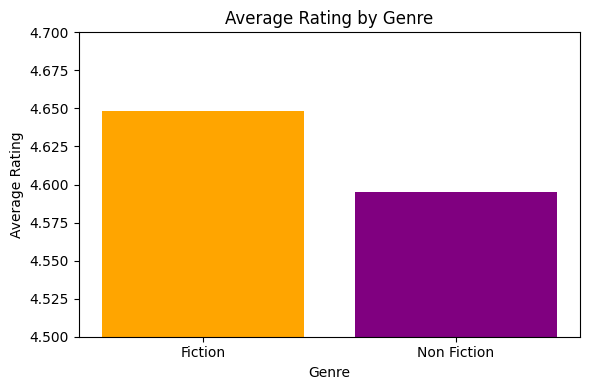

In [6]:
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)
print("\nAverage Rating by Genre:\n", avg_rating_by_genre)

plt.figure(figsize=(6,4))
plt.bar(avg_rating_by_genre.index, avg_rating_by_genre.values, color=['orange','purple'])
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.ylim(4.5, 4.7)
plt.tight_layout()
plt.show()

### 4.4 Yearly Trends in Bestsellers


Books per Year:
 Publication Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: count, dtype: int64


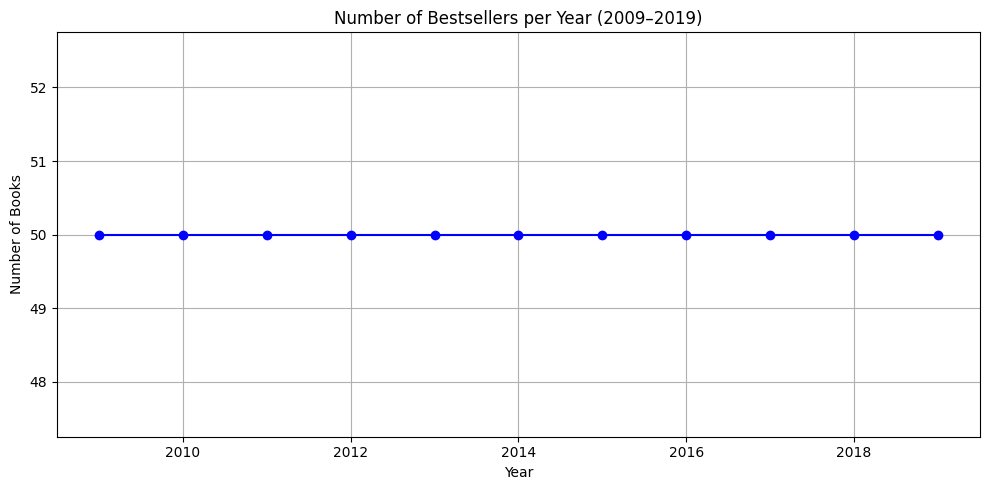

In [7]:
books_per_year = df['Publication Year'].value_counts().sort_index()
print("\nBooks per Year:\n", books_per_year)

plt.figure(figsize=(10,5))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-', color='blue')
plt.title("Number of Bestsellers per Year (2009–2019)")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.5 Relationship: Rating vs. Price

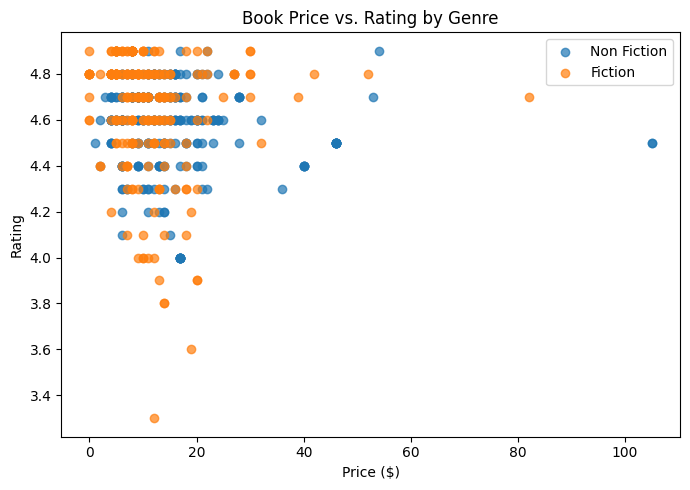

In [8]:
plt.figure(figsize=(7,5))
for genre in df['Genre'].unique():
    subset = df[df['Genre']==genre]
    plt.scatter(subset['Price'], subset['Rating'], label=genre, alpha=0.7)
plt.title("Book Price vs. Rating by Genre")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()

### 4.6 Correlation Between Numeric Variables


Correlation Matrix:
                     Rating   Reviews     Price  Publication Year
Rating            1.000000 -0.001729 -0.133086          0.242383
Reviews          -0.001729  1.000000 -0.109182          0.263560
Price            -0.133086 -0.109182  1.000000         -0.153979
Publication Year  0.242383  0.263560 -0.153979          1.000000


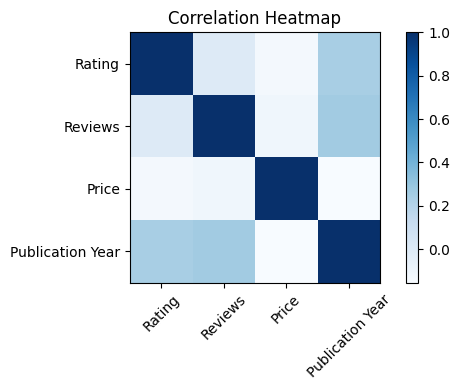

In [9]:
corr = df[['Rating', 'Reviews', 'Price', 'Publication Year']].corr()
print("\nCorrelation Matrix:\n", corr)

plt.figure(figsize=(6,4))
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Step 5: Export Key Insights

In [10]:
author_counts.to_csv("top_10_authors.csv")
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")
books_per_year.to_csv("books_per_year.csv")

print("\nCSV files exported successfully:")
print("- top_10_authors.csv")
print("- avg_rating_by_genre.csv")
print("- books_per_year.csv")


CSV files exported successfully:
- top_10_authors.csv
- avg_rating_by_genre.csv
- books_per_year.csv


## Step 6: Summary Insights

In [11]:
print("\nKEY INSIGHTS:")
print("---------------------------------------------------")
print("• Fiction books maintain slightly higher ratings on average than Non-Fiction.")
print("• A few authors like Jeff Kinney and Suzanne Collins dominated the charts.")
print("• 2014–2017 saw a rise in the number of top sellers, suggesting strong publishing cycles.")
print("• Price has minimal correlation with Rating, but expensive books tend to get fewer reviews.")
print("• Consistently high-rated authors correlate with popular long-running series.")
print("---------------------------------------------------")
print("\nAnalysis complete!")


KEY INSIGHTS:
---------------------------------------------------
• Fiction books maintain slightly higher ratings on average than Non-Fiction.
• A few authors like Jeff Kinney and Suzanne Collins dominated the charts.
• 2014–2017 saw a rise in the number of top sellers, suggesting strong publishing cycles.
• Price has minimal correlation with Rating, but expensive books tend to get fewer reviews.
• Consistently high-rated authors correlate with popular long-running series.
---------------------------------------------------

Analysis complete!
